# Intro

**Sloan Digital Sky Survey - DR18**

In this Machine Learning project we will classify the observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either:
* a STAR
* a GALAXY
* a QSO (Quasi-Stellar Object) or a Quasar.

We will use **CatBoostClassifier** from catboost and **XGBClassifier** from xgboost

# Load packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

# Load the data

In [6]:
dataset = pd.read_csv('SDSS_DR18.csv')

# Data Exploration and Analysis

In [7]:
dataset.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [8]:
# Show number of rows and columns (m, n)
dataset.shape

(100000, 43)

**Check for null or missing values in the data**

In [9]:
null = dataset.isnull().sum().max()

if null == 0:
    print('There is no missing values')
else:
    print('There is missing values')

There is no missing values




Let's show a concise summary of a dataset using info() function                           
such as index dtype and columns, non-null values and memory usage.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n


Let’s get a quick statistical summary of the dataset using the describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [11]:
dataset.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,1.859200e+18,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,...,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,3.020047e+06,2.265257e+18,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,...,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,1.240000e+18,2.990000e+17,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,...,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,1.240000e+18,5.280000e+17,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,...,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,1.240000e+18,6.980000e+17,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,...,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,1.240000e+18,2.750000e+18,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,...,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,1.240000e+18,1.410000e+19,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,...,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


In [12]:
dataset.columns.values

array(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid',
       'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r',
       'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g',
       'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'], dtype=object)

**Target Column**

In [13]:
dataset['class'].value_counts()  # returns a Series containing counts of unique values.

GALAXY    52343
STAR      37232
QSO       10425
Name: class, dtype: int64

Text(0.5, 1.0, 'Class Categories')

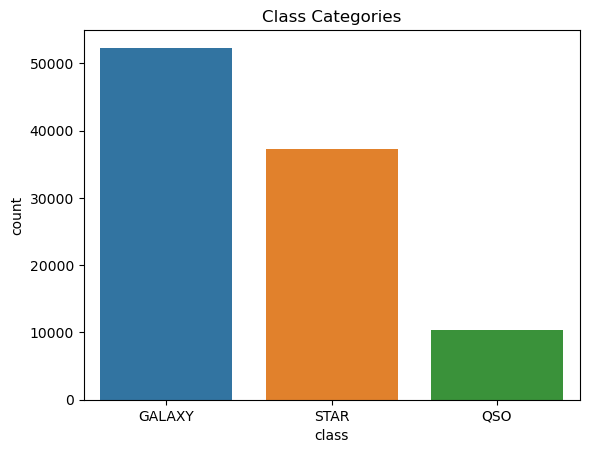

In [14]:
sns.countplot(x = dataset['class'])
plt.title('Class Categories')

Let's use **LabelEncoder** to encode target labels with value between 0 and n_classes-1   
here the target (class) has three unique values a GALAXY, a STAR and a QSO

In [15]:
encoder = LabelEncoder()
dataset['class'] = encoder.fit_transform(dataset['class'])

In [16]:
dataset['class'].value_counts()

0    52343
2    37232
1    10425
Name: class, dtype: int64

A **correlation matrix** is a table containing correlation coefficients between variables, each cell in the table represents the correlation between two variables.

we will use a heatmap from seaborn to visualize the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

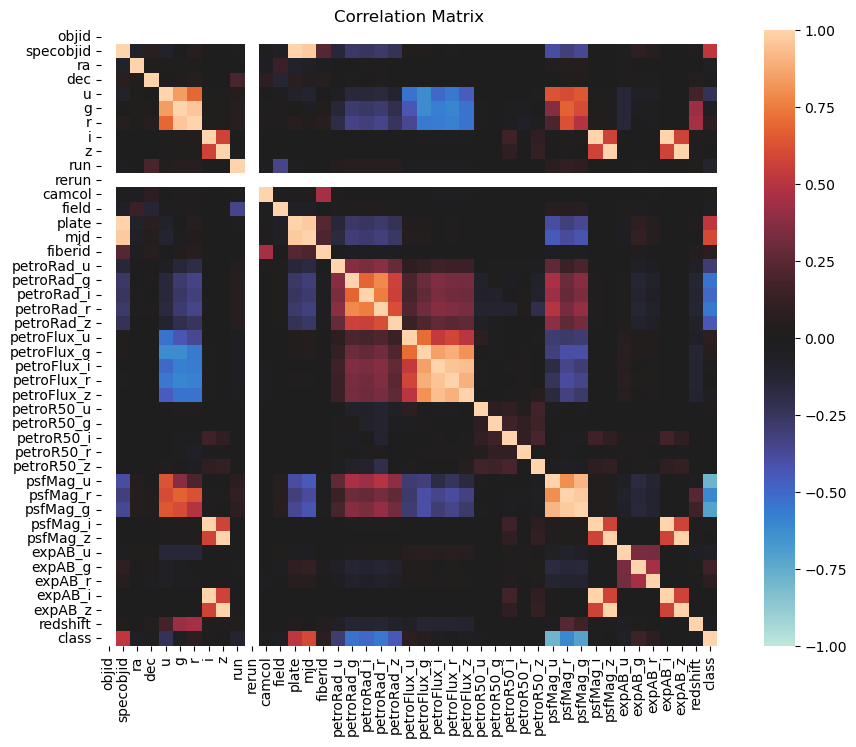

In [17]:
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, center=0, square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Data preprocessing

In [18]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=44)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 42), (30000, 42), (70000,), (30000,))

# The Model

**CatBoost** or Categorical Boosting is a high-performance open source library for gradient boosting on decision trees.                                                          It is designed for use on problems like regression and classification having a very large number of independent features. 

In [22]:
model = CatBoostClassifier(iterations=150,
                           learning_rate=0.1,
                           depth=5)
model.fit(X_train, y_train)

0:	learn: 0.9186187	total: 234ms	remaining: 34.8s
1:	learn: 0.7850771	total: 290ms	remaining: 21.4s
2:	learn: 0.6783593	total: 334ms	remaining: 16.4s
3:	learn: 0.5925153	total: 384ms	remaining: 14s
4:	learn: 0.5210024	total: 439ms	remaining: 12.7s
5:	learn: 0.4614090	total: 494ms	remaining: 11.8s
6:	learn: 0.4107912	total: 557ms	remaining: 11.4s
7:	learn: 0.3682082	total: 614ms	remaining: 10.9s
8:	learn: 0.3306106	total: 681ms	remaining: 10.7s
9:	learn: 0.2979483	total: 740ms	remaining: 10.4s
10:	learn: 0.2694630	total: 784ms	remaining: 9.91s
11:	learn: 0.2445510	total: 837ms	remaining: 9.62s
12:	learn: 0.2226796	total: 886ms	remaining: 9.34s
13:	learn: 0.2031222	total: 949ms	remaining: 9.22s
14:	learn: 0.1860633	total: 1.01s	remaining: 9.06s
15:	learn: 0.1709038	total: 1.05s	remaining: 8.82s
16:	learn: 0.1573256	total: 1.11s	remaining: 8.69s
17:	learn: 0.1452809	total: 1.17s	remaining: 8.58s
18:	learn: 0.1344090	total: 1.25s	remaining: 8.58s
19:	learn: 0.1251535	total: 1.32s	remaining

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred[:10], y_test[:10]

(array([[0],
        [1],
        [2],
        [0],
        [2],
        [0],
        [0],
        [0],
        [2],
        [2]], dtype=int64),
 39574    0
 537      1
 99246    2
 39498    0
 24797    2
 93811    0
 3050     0
 55198    0
 83359    2
 9361     2
 Name: class, dtype: int32)

Calculating Accuracy Score : **((TP + TN) / float(TP + TN + FP + FN))**

In [25]:
Acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score for CatBoostClassifier: {Acc: .4f}')

Accuracy score for CatBoostClassifier:  0.9909


In [26]:
print('classification report for CatBoostClassifier model: \n', classification_report(y_pred, y_test))

classification report for CatBoostClassifier model: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15761
           1       0.96      0.98      0.97      3028
           2       1.00      0.99      1.00     11211

    accuracy                           0.99     30000
   macro avg       0.98      0.99      0.98     30000
weighted avg       0.99      0.99      0.99     30000



**XGBoost** is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms

In [27]:
xgbModel = XGBClassifier(n_estimators=50,          # Number of trees we want to build
                         max_depth=4,              # How deeply each tree is allowed to grow
                         learning_rate=0.1,        # Step size 
                         objective='reg:logistic') # It determines the loss function
xgbModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
preds = xgbModel.predict(X_test)

In [29]:
preds[:10], y_test[:10]

(array([0, 1, 2, 0, 2, 0, 0, 0, 2, 2], dtype=int64),
 39574    0
 537      1
 99246    2
 39498    0
 24797    2
 93811    0
 3050     0
 55198    0
 83359    2
 9361     2
 Name: class, dtype: int32)

In [30]:
Acc = accuracy_score(y_test, preds)
print(f'Accuracy score for XGBClassifier: {Acc: .4f}')

Accuracy score for XGBClassifier:  0.9908


In [31]:
print('classification report for XGBClassifier model: \n', classification_report(preds, y_test))

classification report for XGBClassifier model: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15797
           1       0.96      0.98      0.97      3030
           2       1.00      1.00      1.00     11173

    accuracy                           0.99     30000
   macro avg       0.98      0.99      0.98     30000
weighted avg       0.99      0.99      0.99     30000



# Feature importance with XGBoost

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

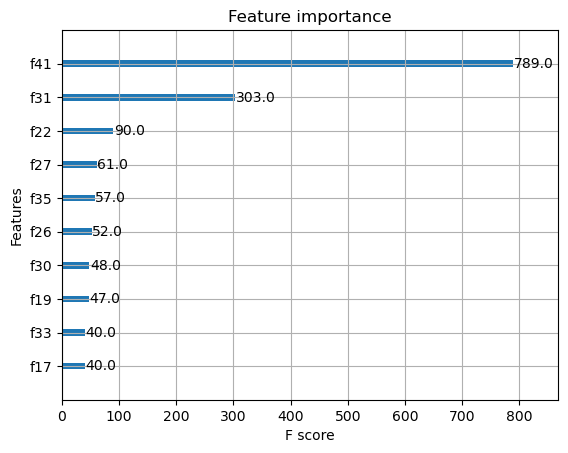

In [32]:
# Let's plot top 10 most important features
plot_importance(xgbModel, max_num_features=10)